In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import sweetviz as sv
import seaborn as sns

In [3]:
data= pd.read_csv("C:\\Users\\prasa\\Downloads\\50_Startups.csv")

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#data types
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
data.info() # complete information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# EDA

In [9]:
#finding duplicates
data[data.duplicated()].shape  # 0 means there are no duplicated values

(0, 5)

In [36]:
#renaming the coloumns to remove spaces
data1=data.rename({'R&D Spend':'RDS', 'Marketing Spend':'MKS', 'Administration': 'ADM'}, axis=1)
data1.head()

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
#missing values
data1.isna().sum()  # below ouput shows there are no missing values

RDS       0
ADM       0
MKS       0
State     0
Profit    0
dtype: int64

<AxesSubplot:>

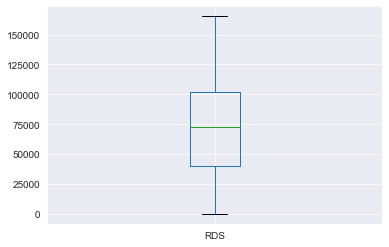

In [38]:
#outlier detection
data1.boxplot(column=['RDS'])

<AxesSubplot:>

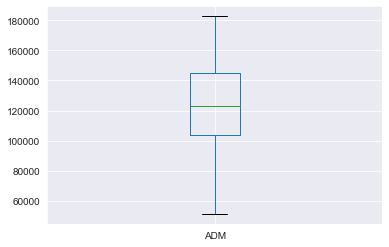

In [39]:
data1.boxplot(column=['ADM'])

<AxesSubplot:>

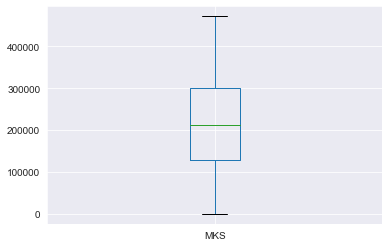

In [40]:
data1.boxplot(column=['MKS'])

<AxesSubplot:>

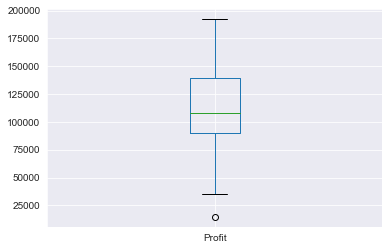

In [32]:
data1.boxplot(column=['Profit'])

In [ ]:
#there is an oulier in the profit

In [41]:
#Correlation Process
data1.corr()

,RDS,ADM,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
# RDS and Profit have strong postive correlation where as MKS and ADM have weak negative correlation.

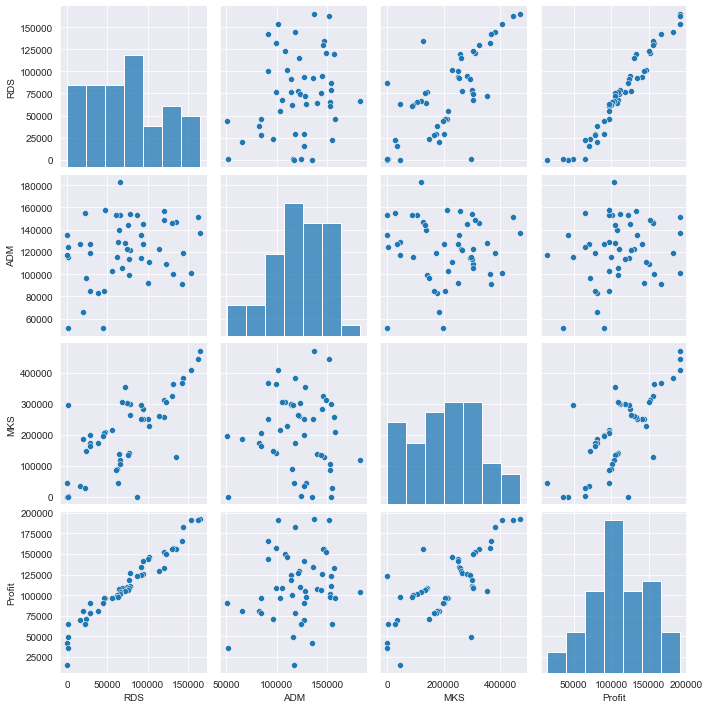

In [42]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Model Building

In [44]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~RDS+MKS+ADM', data=data1).fit()
model.params   #finding parameters

Intercept    50122.192990
RDS              0.805715
MKS              0.027228
ADM             -0.026816
dtype: float64

In [46]:
print(model.tvalues, '\n', model.pvalues)   #finding t-values and p-values

Intercept     7.626218
RDS          17.846374
MKS           1.655077
ADM          -0.525507
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
MKS          1.047168e-01
ADM          6.017551e-01
dtype: float64


In [47]:
#finding R-squared values
(model.rsquared, model.rsquared_adj)  # r-squared value is > 0.8

(0.9507459940683246, 0.9475337762901719)

In [ ]:
# Building Simple Linear Regression Models for ADM and MKS as they have weak negative correlation

In [48]:
lrm_a=smf.ols('Profit~ADM', data=data1).fit()
print(lrm_a.tvalues, "\n", lrm_a.pvalues)  # P-value is not acceptable in ADM

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [49]:
lrm_m=smf.ols('Profit~MKS', data=data1).fit()
print(lrm_m.tvalues, '\n', lrm_m.pvalues)   #P-value in MKS is acceptable as it is below 0.05

Intercept    7.808356
MKS          7.802657
dtype: float64 
 Intercept    4.294735e-10
MKS          4.381073e-10
dtype: float64


In [50]:
lrm_am=smf.ols('Profit~ADM+MKS', data=data1).fit()
print(lrm_am.tvalues, '\n', lrm_am.pvalues)   #When ADM and MKS are combined, both individually have acceptable p_values

Intercept    1.142741
ADM          2.467779
MKS          8.281039
dtype: float64 
 Intercept    2.589341e-01
ADM          1.729198e-02
MKS          9.727245e-11
dtype: float64


# Model Validation

In [51]:
#Collinearity checking by calculating VIF
rsq_r = smf.ols('RDS~ADM+MKS',data=data1).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols('ADM~RDS+MKS', data=data1).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('MKS~RDS+ADM', data=data1).fit().rsquared
vif_m = 1/(1-rsq_m)

#Storing above calculated VIF values in a data frame
d1 = {'Variables':['RDS','ADM','MKS'],'VIF':[vif_r,vif_a,vif_m]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKS,2.326773


In [ ]:
# All the variables has VIF<10 , means there is no collinearity

C:\Users\prasa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


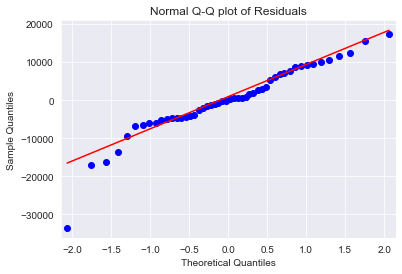

In [53]:
#Residual Analysis
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot= sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [54]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [57]:
#Plot for Homoscedosticity
def get_standardized_values( vals ): return (vals - vals.mean())/vals.std()

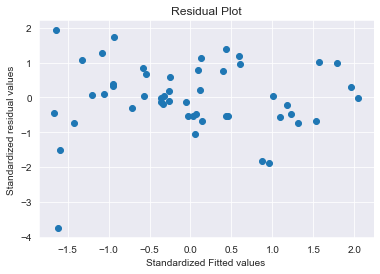

In [58]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

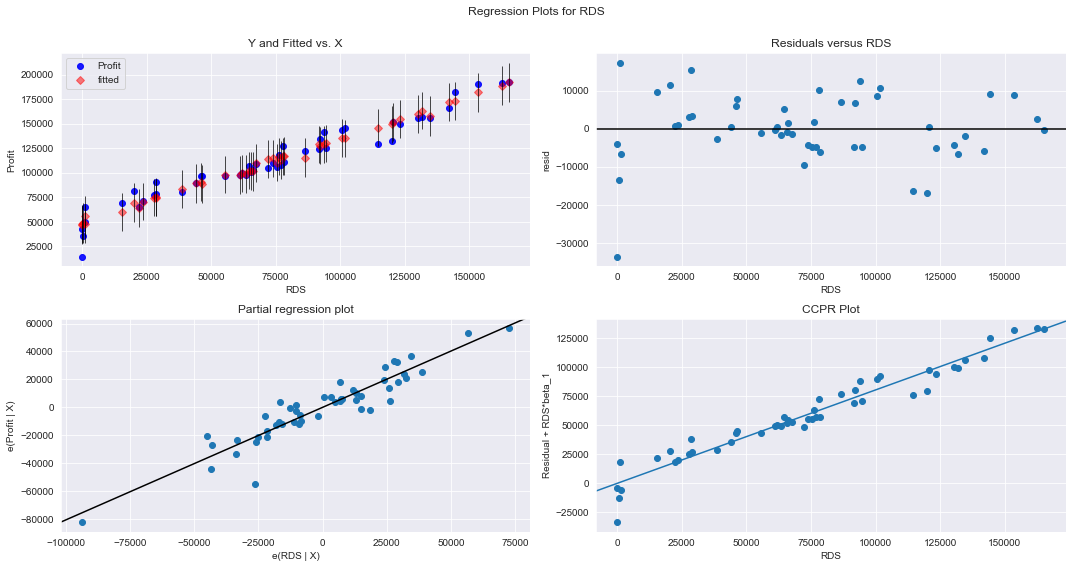

In [59]:
#Residual Vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

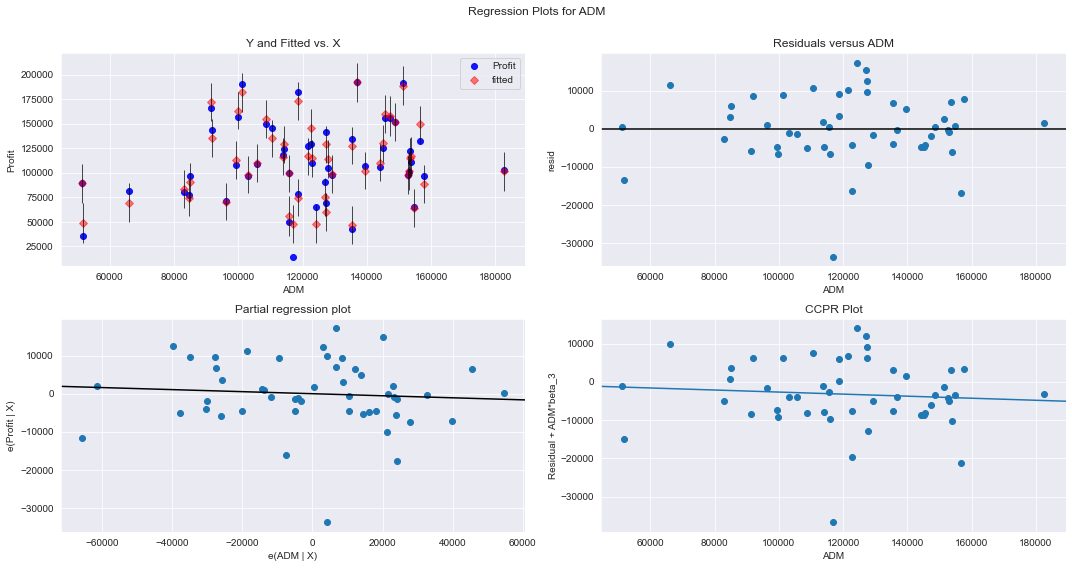

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

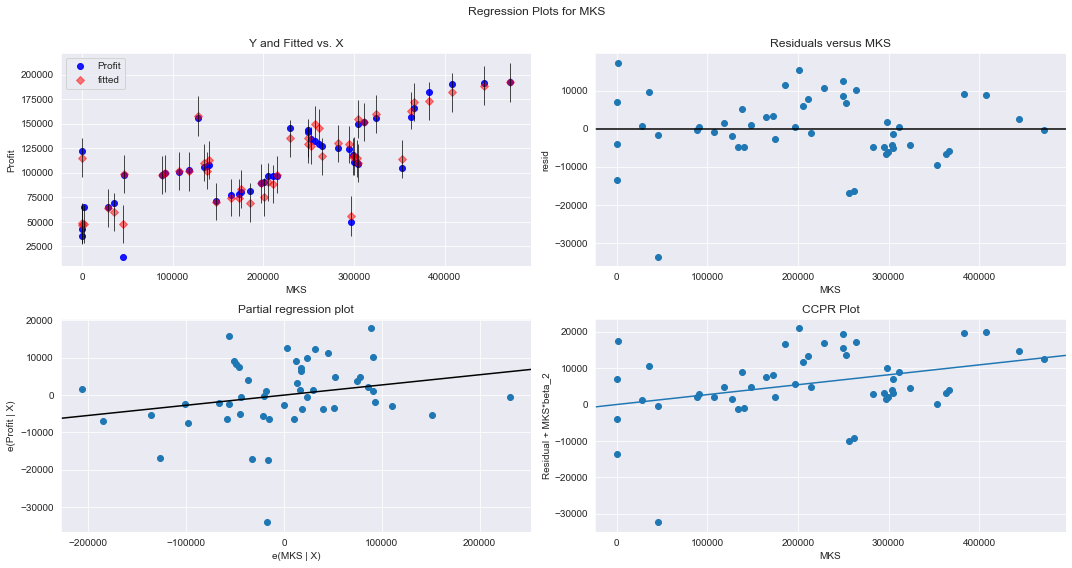

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKS", fig=fig)
plt.show()

In [63]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Cook’s Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c   # Cook's Distance>1 means there is a Outlier Or Influencer

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

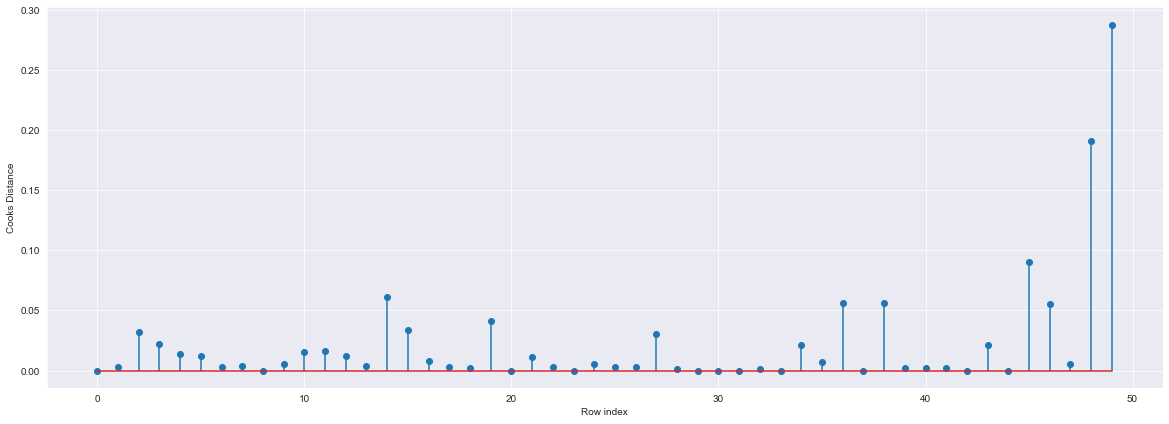

In [64]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [65]:
#Index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432695)

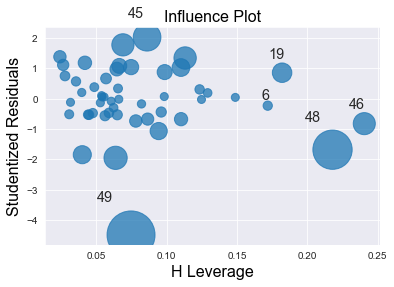

In [69]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show() 

In [ ]:
#From the above plot, it is evident that data point 49 is the influencer

In [70]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [73]:
data1[data1.index.isin([49])]

,RDS,ADM,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [76]:
#Discard the data points which are influencers and reasign the row number (reset_index())

data2=data1.drop(data1.index[[49]],axis=0).reset_index()
data2.head()

,index,RDS,ADM,MKS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [79]:
#Build Model
#checking which model is best
final_lrm_A= smf.ols('Profit~RDS+ADM',data = data2).fit()
(final_lrm_A.rsquared,final_lrm_A.aic)

(0.9584519070123048, 1022.0654576388338)

In [80]:
final_lrm_M= smf.ols('Profit~RDS+MKS',data = data2).fit()
(final_lrm_M.rsquared,final_lrm_M.aic)

(0.9610856807456628, 1018.8564801588338)

In [81]:
# comparing above models, final_lrm_M has high Rsquared value and less AIC value. hence include MKS variable

In [83]:
model_influence_M = final_lrm_M.get_influence()
(c_M, _) = model_influence_M.cooks_distance

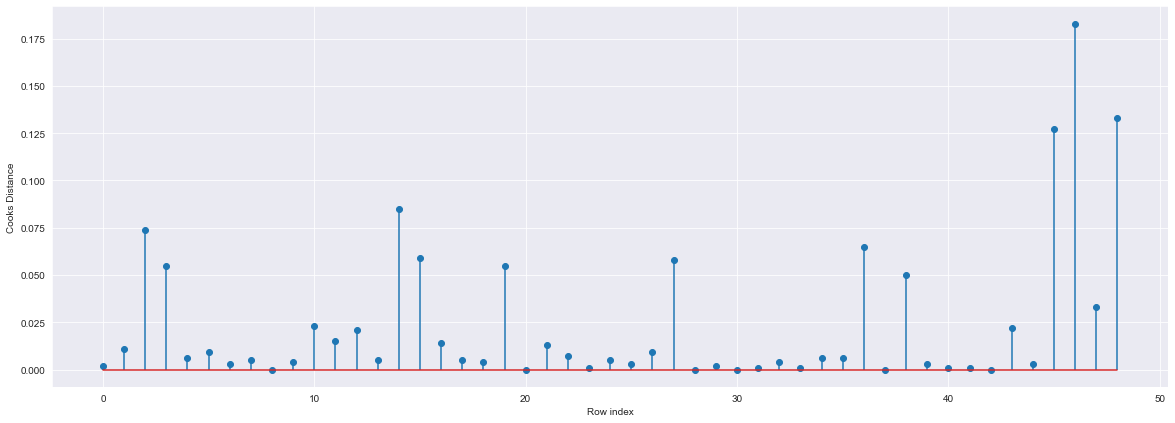

In [85]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_M,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [86]:
#index of the data points where c is more than .5
(np.argmax(c_M),np.max(c_M))

(46, 0.18337556491338716)

In [87]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [90]:
#Predicting for new data
new_data=pd.DataFrame({'RDS':50000,"ADM":80000,"MKS":100000},index=[0])
new_data

,RDS,ADM,MKS
0,50000,80000,100000


In [91]:
final_lrm_M.predict(new_data)

0    91299.014096
dtype: float64

In [93]:
pred_y = final_lrm_M.predict(data2)
pred_y

0     190942.726927
1     188043.924520
2     179957.312472
3     172246.416164
4     170022.687457
5     161999.405410
6     157669.178690
7     159705.298181
8     151804.380605
9     153787.521922
10    135096.466868
11    134699.049858
12    129422.677987
13    128049.202655
14    149827.450777
15    145769.611357
16    117530.489091
17    130936.300519
18    129020.306206
19    116793.710748
20    117108.281313
21    118793.642939
22    115484.209637
23    110513.437292
24    113382.099441
25    103711.697086
26    111873.132740
27    115389.649335
28    104243.190309
29    103595.167960
30    100355.932697
31     99610.626757
32    100216.309933
33     98705.145163
34     91568.745065
35     91104.335025
36     77530.715090
37     89363.970985
38     70555.662763
39     84485.861451
40     76823.378730
41     75926.972539
42     72178.031523
43     62783.416125
44     67759.192437
45     50613.086380
46     58959.714353
47     49785.269847
48     50205.566671
dtype: float64

In [96]:
# table conatining Rsquared values of model and final model

d2={'Prepared_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_lrm_M.rsquared]}
table=pd.DataFrame(d2)
table

,Prepared_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961086


In [ ]:
#R-squared value is improoved